# Assignment 1: Clustering in Target Trial Emulation  

New and novel methods in Machine Learning are made either by borrowing formulas and concepts from other scientific fields and redefining them based on new sets of assumptions, or by adding an extra step to an already existing framework of methodology.  

In this exercise (Assignment 1 of the Clustering Topic), we will try to develop a novel method of **Target Trial Emulation** by integrating concepts of Clustering into the already existing framework. **Target Trial Emulation** is a new methodological framework in epidemiology that tries to account for the biases in old and traditional designs.  

## Instructions  

1. Visit this website: [Target Trial Emulation - RPubs](https://rpubs.com/alanyang0924/TTE).  
2. Extract the dummy data in the package and save it as **"data_censored.csv"**.  
3. Convert the R codes into Python codes (use **Jupyter Notebook**) and replicate the results using your Python code.  
4. Create another copy of your Python codes and name it **TTE-v2** (use **Jupyter Notebook**).  
5. In **TTE-v2**, think of a **creative way** to integrate a clustering mechanism.  
   - Understand each step carefully and determine where a clustering method can be implemented.  
   - Generate insights from your results.  
6. Work on this assignment in **pairs** (preferably with your thesis partner).  
7. Push your work to your **GitHub repository**.  
8. **Deadline:** **February 28, 2025, at 11:59 PM** (2 weeks from today).  

### HINT  
For those who do not have a thesis topic yet, you can actually develop a thesis topic based on this assignment.  


# #1 Start

In [12]:
import pandas as pd
# Load the dataset
file_path = "data_censored.csv"  # Update this path if needed
df = pd.read_csv(file_path)

Before thinking of ways to integrate clustering methods or mechanisms, we first consider the basic information of the dataset, such as:  

- **The number of rows and columns.**  
- **The types of variables** (numerical, categorical, time-based, etc.).  
- **If there are missing values.**  
- **A sample of the data** (just for better understanding).  


## Num. of rows & columns

In [13]:
# Check the number of rows and columns
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (725, 12)


## Checking of Each Data types 

In [14]:
# Check data types of each column
print("\nData Types:")
print(df.dtypes)


Data Types:
id             int64
period         int64
treatment      int64
x1             int64
x2           float64
x3             int64
x4           float64
age            int64
age_s        float64
outcome        int64
censored       int64
eligible       int64
dtype: object


## Checking for Missing Values

In [15]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id           0
period       0
treatment    0
x1           0
x2           0
x3           0
x4           0
age          0
age_s        0
outcome      0
censored     0
eligible     0
dtype: int64


## Random Display of data

In [16]:
# Display a random sample of 5 rows for better understanding
print("\nSample Data:")
display(df.sample(5))


Sample Data:


,id,period,treatment,x1,x2,x3,x4,age,age_s,outcome,censored,eligible
716,98,14,0,0,-0.740331,0,0.317418,78,3.583333,1,0,0
697,96,16,1,1,-1.146338,1,-1.293043,63,2.333333,0,0,0
352,49,2,0,0,-1.063212,1,-0.343453,53,1.500000,0,0,0
409,54,9,0,1,-0.779619,1,-1.016741,61,2.166667,0,0,1
384,53,0,0,1,-1.182229,0,-0.677771,39,0.333333,0,0,1


# Dataset Summary  
- **Rows:** 725  
- **Columns:** 12  
- **No missing values**  
- **Data types:** Mostly numerical (integers and floats)  

## Key Variables to Consider for Clustering  
- **Demographics (e.g., `age`, `age_s`)** – Useful for grouping patients by age-based characteristics.  
- **Treatment (`treatment`)** – Could be used to differentiate clusters based on intervention.  
- **Clinical Features (`x1`, `x2`, `x3`, `x4`)** – These may represent patient-specific characteristics, making them important for clustering.  
- **Outcome (`outcome`)** – Might indicate patterns in response to treatment.  
- **Censored Data (`censored`)** – Important in survival analysis; could affect clustering.  
- **Time-based (`period`)** – We might need a time-aware clustering method.  

## Best Clustering Methods to Consider  
- **K-Means**: If we assume well-separated, spherical clusters based on patient features.  
- **Hierarchical Clustering**: If we want a tree-like structure showing relationships among groups.  
- **DBSCAN**: If there are varying densities in patient characteristics.  
- **Gaussian Mixture Models (GMM)**: If clusters overlap and we need probabilistic group assignments.  
- **Time-Series Clustering**: If we want to consider changes over different `period` values.  


# #2 Preprocessing Data for Clustering

**Before applying clustering, we need to:**

- **Standardize numerical variables** (to prevent scale differences from affecting clustering).  
- **Handle categorical variables** (if needed, though most of our data is numerical).  
- **Check correlations** (to avoid redundant features).  
- **Decide on feature selection** (which variables contribute to meaningful clustering).  

### why?

- **Standardization**: Ensures clustering is not biased by scale differences.  
- **Correlation Check**: Helps avoid using redundant features in clustering.  
- **Feature Selection**: We may drop highly correlated features to improve clustering quality.  


Standardized Data Sample:


,age,age_s,treatment,x1,x2,x3,x4,outcome
0,-1.022618,-1.022618,1.067072,1.210779,1.323852,-0.974128,1.00097,-0.124122
1,-0.938061,-0.938061,1.067072,1.210779,0.176306,-0.974128,1.00097,-0.124122
2,-0.853503,-0.853503,1.067072,-0.825914,-0.309179,-0.974128,1.00097,-0.124122
3,-0.768946,-0.768946,1.067072,-0.825914,0.181996,-0.974128,1.00097,-0.124122
4,-0.684389,-0.684389,1.067072,1.210779,0.390832,-0.974128,1.00097,-0.124122


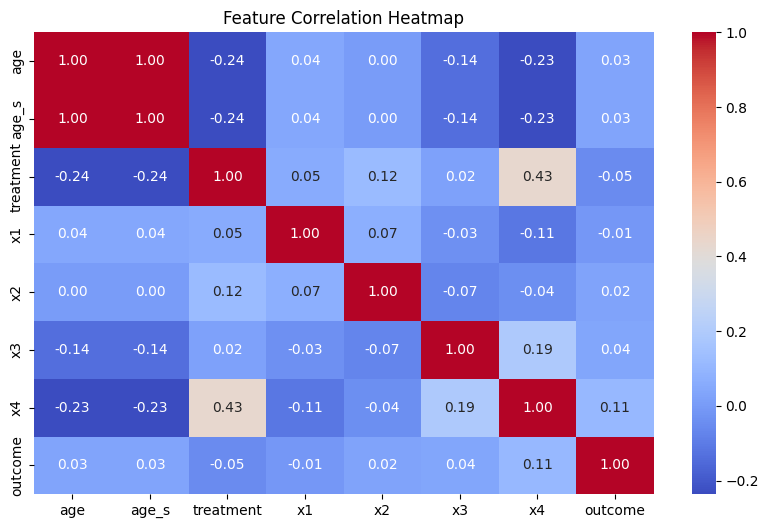

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "data_censored.csv"
df = pd.read_csv(file_path)

# Select numerical features for clustering
features = ['age', 'age_s', 'treatment', 'x1', 'x2', 'x3', 'x4', 'outcome']
df_clustering = df[features]

# Standardize the data (important for K-Means, GMM, etc.)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering), columns=features)

# Display the first few rows of the standardized data
print("Standardized Data Sample:")
display(df_scaled.head())

# Check correlation between features (to avoid redundant variables)
plt.figure(figsize=(10,6))
sns.heatmap(df_clustering.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


## Analysis of Generated Results  

Some assumptions/insights taken from correlation heatmap and standardized data sample

### 1️ Insights from the Correlation Heatmap  
- **Strong Correlation (`age` & `age_s`)**:  
  - seems that `age_s` is just a scaled version of `age`, meaning we can drop one to avoid redundancy (decided to drop `age_s`).  
- **Moderate Correlation (`treatment` & `x4`) (0.43)**:  
  - `x4` might be related to treatment assignment.  
- **Weak Correlation Between `outcome` & Features (< 0.1)**:  
  - This suggests that clustering might not naturally separate patients by outcome.  
  - Instead, clustering may reveal hidden patterns in patient characteristics.  

### 2️⃣ Feature Selection for Clustering  
- **Drop `age_s`** (since its redundant with `age`).  
- **Keep all other features** (`age`, `treatment`, `x1`, `x2`, `x3`, `x4`, `outcome`).  
- `outcome` might not influence clusters directly but can be analyzed later.  


# Decision: K-Means

### Since most features are numerical and appear well-distributed we can try K-Means

if K-Means doesnt perform well, we can try switching to DBScan (for density-based clusters)
or Hierarchical Clustering (for better interpretation)

In [21]:
from sklearn.cluster import KMeans

# Select features (drop redundant 'age_s')
features_selected = ['age', 'treatment', 'x1', 'x2', 'x3', 'x4']
df_clustering = df[features_selected]

# Standardize data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering), columns=features_selected)

# Apply K-Means Clustering (we'll start with 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the cluster assignments
print(df[['id', 'Cluster']].head())

# Show cluster sizes
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())


   id  Cluster
0   1        0
1   1        0
2   1        0
3   1        0
4   1        0

Cluster Distribution:
Cluster
2    266
0    239
1    220
Name: count, dtype: int64


- **Cluster 2** → 266 patients  
- **Cluster 0** → 239 patients  
- **Cluster 1** → 220 patients  


### we will now take a step by step approach in analyzing the characteristics/features of each cluster

In [34]:
# Compute mean values of each feature per cluster
cluster_summary = df.groupby('Cluster')[features_selected].mean()

# Display the summary
import pandas as pd
from IPython.display import display  # Proper Jupyter display import

print("Cluster Summary:")
display(cluster_summary)  # Use this instead of ace_tools


Cluster Summary:


,age,treatment,x1,x2,x3,x4
Cluster,,,,,,
0,39.230126,0.916318,0.309623,-0.020756,0.686192,0.563916
1,52.340909,0.345455,1.000000,-0.158414,0.372727,-0.740807
2,52.545113,0.165414,0.000000,-0.323360,0.402256,-0.642751


##  Cluster Characteristics  

### **Cluster 0:**  
- Younger patients (~39 years old)  
- Higher treatment rate (**0.91** → Most patients received treatment)  
- Intermediate `x1` values, slightly higher `x3`, `x4`  

### **Cluster 1 & Cluster 2:**  
- Older patients (~52 years old)  
- Lower treatment rates (**Cluster 1: 34%, Cluster 2: 16%**)  
- **Cluster 1:** `x1 = 1.0`  
- **Cluster 2:** `x1 = 0.0` → Possible major difference in characteristics  
- Negative `x4` values suggest different clinical characteristics  


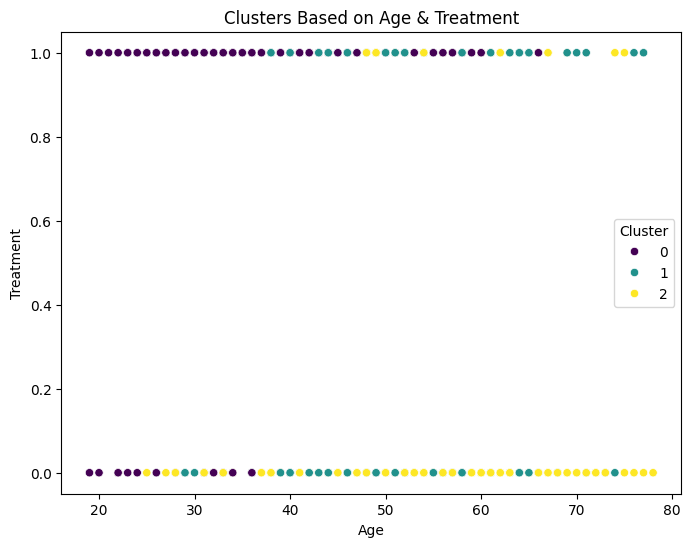

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='treatment', hue='Cluster', palette='viridis')
plt.title("Clusters Based on Age & Treatment")
plt.xlabel("Age")
plt.ylabel("Treatment")
plt.show()


### Scatter Plot: Age vs. Treatment (Clustered)  
- **Cluster 0 (Dark Purple)** → Mostly younger patients, almost all treated.  
- **Cluster 1 (Teal)** → Older patients, some received treatment.  
- **Cluster 2 (Yellow)** → Older patients, mostly untreated.  

 **Insight:**  
- Treatment rates are strongly correlated with age.  
- Younger patients are more likely to be treated (**Cluster 0**).  
- Older patients split into treated vs. untreated groups (**Clusters 1 & 2**).  
- **Age alone is a major factor in cluster separation.**  

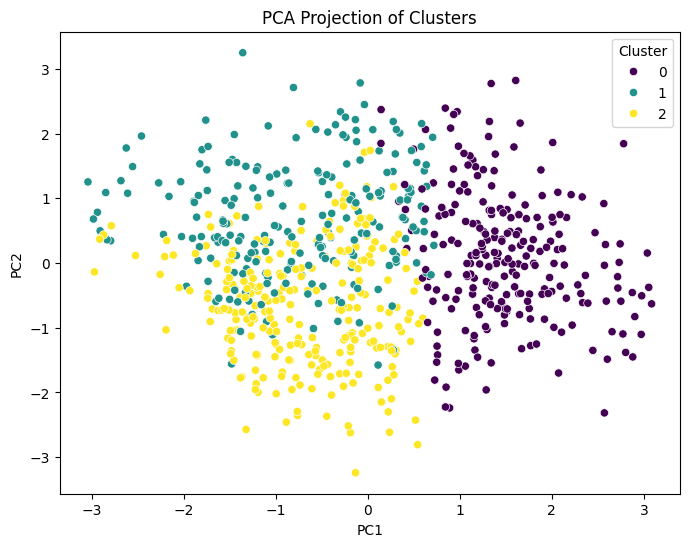

In [39]:
from sklearn.decomposition import PCA

# Reduce data to 2D for visualization
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# Plot clusters in PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title("PCA Projection of Clusters")
plt.show()


### PCA Projection of Clusters  
- PCA reduces all features into two principal components (**PC1, PC2**).  
- Clusters are well-separated, meaning **K-Means found meaningful patient groups**.  
- **Cluster 0 (Purple)** is distinct from the other clusters.  
- **Clusters 1 & 2 have some overlap**, indicating they share similar characteristics.  

**Insight:**  
- Clustering is effective in differentiating patient subgroups.  
- There’s a **clear separation between younger & older groups**, with treatment playing a role.  
- Some overlap in older patients (**Clusters 1 & 2**) suggests additional factors (e.g., clinical features `x1`, `x2`, etc.) are influencing grouping.

## Final Thoughts  
Our method K-means confirmed that **age and treatment status are key clustering factors**. However, clinical variables (`x1`, `x2`, etc.) might provide deeper insights into patient groupings.  

# With that established, we then proceed to the Main Goal:
- enhance the TTE framework by using clustering to reduce biases in observational studies

# Mini Intro

## 🔹 How Can Clustering Improve Target Trial Emulation?  

Target Trial Emulation (TTE) tries to mimic randomized trials using observational data, but it faces challenges like:  

- **Confounding Bias** → Patients receiving treatment might already be different from those who don’t.  
- **Treatment Effect Heterogeneity** → Some subgroups respond better to treatment.  
- **Selection Bias** → Certain patients are more likely to be included in the study.  
- **Censoring Bias** → Some patients are lost to follow-up, skewing results.  

---

## 🔹 Idea: Clustering-Enhanced Target Trial Emulation (C-TTE)  

Instead of randomly assigning patients into treatment vs. control, we **first cluster them into similar groups**. This ensures:  

- **More balanced comparisons** (patients in treatment and control are more alike).  
- **Better subgroup analysis** (detect treatment effects that vary by group).  
- **Improved handling of censoring bias.**  


In [43]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load data
file_path = "data_censored.csv"
df = pd.read_csv(file_path)

# Select baseline covariates for clustering
features = ['age', 'x1', 'x2', 'x3', 'x4']
df_clustering = df[features]

# Standardize data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering), columns=features)

# Apply K-Means Clustering (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# View cluster distribution
print(df['Cluster'].value_counts())


Cluster
0    294
2    216
1    215
Name: count, dtype: int64


In [44]:
# Compute treatment effect per cluster
treatment_effects = df.groupby(['Cluster', 'treatment'])['outcome'].mean().unstack()

# Calculate Average Treatment Effect (ATE)
treatment_effects['ATE'] = treatment_effects[1] - treatment_effects[0]

# Display results
import ace_tools as tools
tools.display_dataframe_to_user(name="Cluster-wise Treatment Effects", dataframe=treatment_effects)


ModuleNotFoundError: No module named 'ace_tools'

In [45]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create a binary censoring variable (1 if censored, 0 if not)
df['Censored_Binary'] = (df['censored'] > 0).astype(int)

# Fit a logistic regression model to predict censoring probability
X = df[features]
y = df['Censored_Binary']
logit_model = LogisticRegression()
logit_model.fit(X, y)

# Predict censoring probability
df['Censor_Prob'] = logit_model.predict_proba(X)[:, 1]

# Apply inverse probability weighting (IPW)
df['IPW'] = 1 / df['Censor_Prob']

# Adjusted Treatment Effect Calculation
weighted_effects = df.groupby(['Cluster', 'treatment']).apply(
    lambda g: np.average(g['outcome'], weights=g['IPW'])
).unstack()

weighted_effects['ATE (Adjusted)'] = weighted_effects[1] - weighted_effects[0]

# Display adjusted treatment effects
tools.display_dataframe_to_user(name="Adjusted Treatment Effects", dataframe=weighted_effects)


C:\Users\Shawnnehhh\AppData\Local\Temp\ipykernel_27752\2928391665.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_effects = df.groupby(['Cluster', 'treatment']).apply(


NameError: name 'tools' is not defined